In [48]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import re
from bs4 import BeautifulSoup
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

In [49]:
df = pd.read_csv("test-text-labels.csv",header=None)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,sad\t Isn't it [#TRIGGERWORD#] that this is on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fear\tuhh actually couldn't sleep well last ni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,surprise\tPeople where just [#TRIGGERWORD#] be...,"he clearly said ""You"". #EastEnders #EELive",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fear\t Hello! hit their target yesterday and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fear\tShe doesnt have tonbe [#TRIGGERWORD#] be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28507 entries, 0 to 28506
Data columns (total 13 columns):
0     28507 non-null object
1     5619 non-null object
2     1210 non-null object
3     269 non-null object
4     57 non-null object
5     21 non-null object
6     7 non-null object
7     2 non-null object
8     1 non-null object
9     0 non-null float64
10    0 non-null float64
11    0 non-null float64
12    1 non-null object
dtypes: float64(3), object(10)
memory usage: 2.8+ MB


In [52]:
df.info

<bound method DataFrame.info of                                                       0   \
0      sad\t Isn't it [#TRIGGERWORD#] that this is on...   
1      fear\tuhh actually couldn't sleep well last ni...   
2      surprise\tPeople where just [#TRIGGERWORD#] be...   
3      fear\t Hello!  hit their target yesterday and ...   
4      fear\tShe doesnt have tonbe [#TRIGGERWORD#] be...   
5      fear\tI think they're running [#TRIGGERWORD#] ...   
6      disgust\tIm almost [#TRIGGERWORD#] because you...   
7      fear\tIf I’m ever quiet around you be worried ...   
8      fear\tIt to late to rewind.  It’s to late for ...   
9      anger\t     People are [#TRIGGERWORD#] because...   
10     disgust\tI am [#TRIGGERWORD#] that I just turn...   
11     fear\tI was looking so hard at my comp screen ...   
12     fear\tDude don't make me choose. And I'm [#TRI...   
13     disgust\tBlehh i think its so [#TRIGGERWORD#] ...   
14                     fear\tAs a gooner & an Englishman   
15     j

In [53]:
'''for i in range (len(df)):
    text=df[0][i].split('\t')[0]
    text[1].replace("[#TRIGGERWORD#]", text[0])
    text[1].replace('@USERNAME','')
    new_df[1][i]=text[1]
    new_df[0][i]=text[0]
    print(text)'''

'for i in range (len(df)):\n    text=df[0][i].split(\'\t\')[0]\n    text[1].replace("[#TRIGGERWORD#]", text[0])\n    text[1].replace(\'@USERNAME\',\'\')\n    new_df[1][i]=text[1]\n    new_df[0][i]=text[0]\n    print(text)'

In [54]:
for i in range(2,13):

    df = df.drop(i, 1)

In [55]:
'''col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Text','Emotion']
new_df.head()'''

"col = [0,1]\nnew_df = df[col]\nnew_df = new_df[pd.notnull(df[1])]\nnew_df.columns = ['Text','Emotion']\nnew_df.head()"

In [56]:
for i in range (len(df)):
    text=df[0][i].split('\t')
    df[1][i]=text[1].replace('[#TRIGGERWORD#]',text[0])
    df[0][i]=text[0]
    print(text[0])

sad
fear
surprise
fear
fear
fear
disgust
fear
fear
anger
disgust
fear
fear
disgust
fear
joy
surprise
anger
surprise
sad
fear
sad
anger
fear
fear
sad
disgust
anger
sad
fear
joy
disgust
surprise
disgust
surprise
fear
anger
surprise
joy
fear
fear
sad
anger
anger
disgust
surprise
surprise
joy
surprise
surprise
surprise
anger
joy
surprise
surprise
sad
surprise
anger
fear
surprise
fear
fear
anger
joy
sad
anger
sad
sad
anger
joy
disgust
disgust
surprise
sad
anger
sad
joy
surprise
sad
joy
anger
disgust
joy
disgust
fear
fear
disgust
anger
fear
surprise
joy
disgust
sad
fear
anger
fear
fear
joy
anger
anger
joy
joy
fear
joy
fear
disgust
joy
anger
anger
fear
fear
joy
anger
anger
surprise
anger
sad
anger
fear
joy
fear
joy
disgust
disgust
sad
anger
disgust
joy
sad
surprise
disgust
surprise
anger
disgust
fear
joy
sad
sad
sad
joy
disgust
fear
fear
sad
sad
joy
surprise
joy
anger
disgust
disgust
anger
disgust
fear
surprise
sad
joy
sad
anger
disgust
disgust
sad
anger
fear
disgust
anger
anger
fear
joy
sad


anger
joy
disgust
fear
anger
surprise
surprise
surprise
anger
anger
anger
joy
surprise
joy
sad
surprise
surprise
anger
anger
surprise
sad
joy
surprise
anger
disgust
joy
fear
joy
surprise
joy
sad
sad
joy
fear
fear
disgust
joy
surprise
anger
sad
anger
disgust
joy
surprise
anger
anger
joy
joy
fear
anger
disgust
joy
sad
fear
fear
fear
surprise
sad
sad
anger
disgust
surprise
joy
joy
disgust
anger
fear
anger
disgust
sad
fear
sad
joy
disgust
anger
joy
fear
surprise
surprise
fear
disgust
anger
surprise
anger
fear
joy
joy
surprise
sad
sad
disgust
anger
surprise
surprise
surprise
sad
sad
surprise
joy
joy
anger
fear
disgust
fear
joy
disgust
sad
disgust
joy
surprise
surprise
fear
anger
joy
anger
sad
sad
anger
joy
disgust
joy
anger
sad
fear
sad
surprise
sad
joy
joy
surprise
fear
joy
joy
surprise
sad
joy
fear
fear
surprise
fear
sad
disgust
fear
disgust
disgust
fear
surprise
joy
joy
joy
joy
anger
disgust
surprise
fear
sad
surprise
sad
disgust
joy
joy
anger
joy
joy
anger
surprise
joy
surprise
joy
ange

disgust
joy
joy
anger
sad
disgust
disgust
joy
anger
anger
anger
anger
joy
anger
anger
anger
joy
joy
sad
anger
disgust
sad
anger
disgust
disgust
anger
sad
sad
surprise
sad
anger
disgust
surprise
joy
surprise
surprise
fear
joy
disgust
surprise
joy
anger
surprise
anger
fear
fear
joy
sad
joy
disgust
disgust
fear
surprise
disgust
anger
anger
anger
sad
surprise
joy
disgust
anger
surprise
surprise
joy
anger
fear
joy
joy
sad
anger
anger
surprise
sad
fear
sad
surprise
anger
disgust
sad
surprise
surprise
fear
joy
anger
surprise
joy
anger
sad
joy
fear
disgust
disgust
joy
surprise
surprise
disgust
sad
sad
fear
sad
anger
surprise
fear
disgust
anger
surprise
disgust
joy
sad
sad
anger
joy
anger
anger
disgust
joy
joy
fear
disgust
joy
sad
disgust
fear
disgust
joy
sad
joy
fear
joy
joy
sad
sad
sad
anger
surprise
disgust
joy
fear
fear
disgust
surprise
fear
anger
joy
sad
disgust
surprise
fear
disgust
disgust
fear
anger
fear
anger
joy
surprise
anger
anger
sad
surprise
joy
fear
sad
fear
disgust
joy
sad
joy
s

joy
anger
fear
sad
fear
joy
anger
anger
sad
surprise
fear
sad
surprise
anger
disgust
sad
surprise
fear
disgust
anger
sad
fear
disgust
fear
joy
anger
joy
surprise
joy
surprise
surprise
disgust
surprise
joy
fear
surprise
surprise
surprise
surprise
sad
anger
joy
fear
joy
disgust
fear
sad
anger
fear
disgust
disgust
surprise
disgust
fear
fear
joy
disgust
anger
fear
fear
sad
surprise
surprise
anger
fear
joy
anger
surprise
disgust
anger
joy
fear
fear
sad
disgust
disgust
fear
surprise
anger
anger
sad
disgust
joy
surprise
fear
surprise
sad
fear
sad
sad
sad
surprise
fear
disgust
fear
disgust
disgust
surprise
fear
surprise
joy
joy
disgust
disgust
fear
sad
sad
disgust
fear
anger
disgust
sad
joy
anger
surprise
surprise
anger
disgust
disgust
anger
sad
fear
anger
disgust
fear
anger
fear
sad
joy
surprise
fear
sad
sad
fear
anger
anger
joy
joy
anger
joy
disgust
disgust
disgust
anger
sad
fear
fear
joy
anger
anger
surprise
sad
joy
surprise
disgust
fear
anger
joy
disgust
joy
sad
anger
disgust
joy
anger
sur

joy
joy
surprise
joy
anger
joy
fear
disgust
anger
sad
joy
anger
sad
anger
joy
fear
sad
joy
surprise
disgust
joy
anger
surprise
sad
disgust
surprise
surprise
anger
surprise
sad
sad
anger
anger
sad
surprise
joy
joy
fear
sad
joy
fear
joy
sad
sad
sad
joy
joy
disgust
joy
fear
joy
joy
joy
joy
sad
joy
joy
surprise
fear
surprise
fear
anger
joy
joy
sad
surprise
surprise
disgust
joy
fear
joy
anger
joy
fear
sad
anger
disgust
fear
sad
fear
joy
joy
joy
surprise
disgust
disgust
sad
surprise
sad
surprise
sad
sad
joy
sad
joy
sad
joy
disgust
fear
anger
fear
anger
surprise
disgust
joy
surprise
joy
joy
anger
joy
sad
joy
surprise
disgust
joy
joy
surprise
sad
anger
surprise
joy
joy
surprise
surprise
anger
anger
joy
surprise
surprise
anger
disgust
sad
joy
surprise
anger
sad
joy
joy
disgust
joy
sad
disgust
disgust
sad
disgust
anger
anger
anger
sad
joy
disgust
joy
sad
joy
anger
surprise
fear
disgust
fear
anger
surprise
fear
joy
anger
surprise
anger
surprise
joy
sad
fear
anger
sad
anger
joy
disgust
anger
surpr

fear
disgust
disgust
joy
joy
fear
sad
surprise
fear
anger
joy
joy
sad
surprise
surprise
joy
anger
fear
disgust
sad
disgust
sad
disgust
fear
surprise
anger
fear
surprise
disgust
anger
joy
joy
disgust
fear
surprise
joy
joy
joy
joy
joy
disgust
surprise
fear
disgust
disgust
disgust
sad
anger
disgust
joy
disgust
joy
joy
joy
joy
surprise
disgust
anger
anger
fear
disgust
anger
surprise
sad
anger
sad
sad
disgust
fear
fear
fear
joy
disgust
anger
fear
fear
fear
surprise
anger
fear
disgust
anger
sad
anger
surprise
joy
anger
anger
anger
sad
disgust
anger
anger
fear
disgust
anger
joy
anger
fear
surprise
fear
disgust
disgust
joy
fear
anger
surprise
sad
disgust
anger
surprise
fear
surprise
joy
fear
sad
surprise
disgust
anger
anger
sad
fear
sad
sad
fear
anger
anger
sad
surprise
joy
disgust
joy
surprise
disgust
sad
surprise
surprise
anger
fear
fear
disgust
disgust
surprise
sad
surprise
anger
anger
disgust
surprise
joy
anger
fear
joy
disgust
anger
joy
joy
fear
joy
fear
fear
fear
disgust
anger
disgust
sa

disgust
disgust
anger
surprise
anger
anger
joy
fear
fear
fear
fear
sad
joy
surprise
fear
surprise
surprise
surprise
sad
surprise
surprise
fear
joy
joy
surprise
joy
disgust
disgust
surprise
sad
disgust
sad
disgust
sad
sad
surprise
anger
disgust
disgust
surprise
sad
fear
anger
disgust
fear
fear
fear
sad
disgust
sad
fear
surprise
joy
fear
disgust
fear
fear
fear
sad
anger
anger
joy
fear
fear
sad
anger
joy
disgust
anger
joy
surprise
sad
sad
fear
sad
disgust
surprise
surprise
joy
surprise
sad
disgust
sad
fear
surprise
sad
joy
sad
surprise
surprise
sad
anger
anger
anger
disgust
sad
joy
anger
fear
anger
surprise
joy
anger
fear
surprise
joy
fear
disgust
anger
joy
surprise
sad
sad
surprise
joy
disgust
sad
disgust
sad
anger
anger
joy
fear
anger
joy
sad
joy
disgust
joy
fear
disgust
anger
fear
disgust
anger
surprise
anger
fear
joy
anger
fear
surprise
anger
joy
anger
surprise
fear
disgust
anger
sad
anger
joy
anger
fear
fear
sad
surprise
surprise
fear
anger
disgust
disgust
anger
surprise
surprise
fea

sad
sad
sad
joy
fear
sad
anger
fear
sad
fear
anger
anger
anger
disgust
fear
fear
joy
joy
surprise
joy
surprise
joy
joy
joy
fear
sad
anger
joy
disgust
disgust
anger
disgust
anger
disgust
disgust
disgust
disgust
sad
anger
anger
anger
fear
surprise
anger
sad
joy
joy
surprise
joy
disgust
fear
surprise
disgust
disgust
anger
disgust
fear
surprise
fear
sad
joy
fear
disgust
sad
disgust
anger
anger
sad
joy
anger
anger
surprise
anger
joy
anger
sad
sad
sad
disgust
joy
sad
joy
sad
sad
fear
sad
sad
anger
surprise
disgust
joy
anger
sad
anger
surprise
sad
anger
joy
joy
anger
anger
anger
anger
joy
joy
fear
fear
disgust
joy
sad
surprise
disgust
fear
fear
disgust
joy
fear
anger
anger
joy
joy
anger
joy
surprise
joy
fear
fear
fear
joy
surprise
sad
anger
fear
joy
disgust
anger
fear
sad
sad
anger
joy
disgust
sad
joy
surprise
joy
disgust
fear
fear
joy
anger
joy
anger
sad
anger
sad
joy
disgust
fear
fear
surprise
anger
anger
surprise
joy
surprise
joy
anger
sad
fear
joy
joy
disgust
fear
joy
fear
fear
sad
disgus

anger
joy
joy
sad
anger
surprise
anger
joy
sad
surprise
fear
surprise
fear
disgust
sad
joy
joy
disgust
disgust
fear
sad
disgust
joy
anger
anger
fear
disgust
sad
surprise
joy
anger
anger
fear
surprise
fear
surprise
surprise
joy
anger
fear
anger
fear
anger
disgust
surprise
surprise
surprise
joy
fear
sad
sad
joy
sad
joy
disgust
sad
anger
joy
fear
joy
joy
joy
joy
joy
fear
anger
fear
joy
joy
fear
disgust
surprise
anger
anger
anger
sad
anger
anger
disgust
disgust
disgust
sad
sad
anger
joy
joy
surprise
fear
joy
anger
sad
joy
fear
sad
fear
disgust
disgust
surprise
joy
fear
disgust
fear
fear
joy
sad
surprise
sad
fear
surprise
fear
surprise
joy
anger
surprise
anger
disgust
disgust
anger
disgust
fear
fear
disgust
surprise
fear
surprise
anger
anger
fear
joy
surprise
surprise
anger
disgust
joy
disgust
surprise
anger
surprise
disgust
sad
joy
surprise
anger
anger
joy
joy
surprise
surprise
joy
joy
joy
anger
joy
anger
sad
fear
sad
fear
anger
anger
sad
surprise
sad
anger
joy
sad
joy
surprise
surprise
di

disgust
anger
fear
joy
sad
disgust
sad
sad
anger
fear
anger
sad
anger
anger
joy
joy
fear
sad
disgust
anger
disgust
anger
anger
surprise
anger
disgust
surprise
disgust
disgust
anger
disgust
disgust
sad
surprise
sad
joy
sad
disgust
sad
fear
joy
fear
anger
sad
anger
joy
joy
joy
joy
joy
fear
anger
surprise
sad
surprise
joy
disgust
anger
disgust
surprise
fear
fear
disgust
anger
joy
surprise
sad
fear
joy
fear
fear
surprise
joy
sad
disgust
sad
fear
sad
fear
surprise
sad
anger
anger
surprise
disgust
surprise
anger
surprise
fear
joy
sad
surprise
surprise
anger
disgust
anger
sad
sad
disgust
sad
fear
disgust
joy
joy
disgust
sad
fear
sad
joy
disgust
anger
surprise
joy
sad
sad
joy
anger
anger
joy
anger
fear
fear
disgust
sad
disgust
sad
surprise
disgust
joy
surprise
joy
fear
joy
joy
sad
fear
anger
fear
surprise
disgust
surprise
surprise
fear
fear
anger
joy
fear
surprise
sad
joy
sad
surprise
anger
anger
disgust
anger
fear
surprise
disgust
fear
anger
sad
sad
disgust
disgust
disgust
anger
disgust
fear


joy
disgust
joy
disgust
sad
joy
disgust
sad
sad
disgust
surprise
disgust
anger
joy
fear
disgust
disgust
joy
joy
joy
joy
joy
anger
joy
disgust
sad
surprise
surprise
surprise
joy
disgust
surprise
joy
anger
surprise
fear
joy
fear
anger
surprise
surprise
disgust
joy
sad
disgust
fear
joy
sad
joy
disgust
anger
sad
surprise
joy
fear
surprise
surprise
fear
sad
anger
fear
sad
anger
joy
joy
disgust
joy
surprise
joy
anger
sad
joy
sad
sad
joy
anger
anger
sad
disgust
fear
joy
anger
sad
fear
disgust
surprise
fear
fear
fear
joy
joy
fear
fear
joy
fear
fear
sad
sad
joy
surprise
sad
fear
joy
sad
surprise
sad
anger
sad
sad
anger
sad
disgust
joy
sad
joy
disgust
joy
surprise
surprise
joy
sad
disgust
sad
fear
joy
fear
disgust
disgust
joy
sad
disgust
joy
joy
sad
surprise
sad
disgust
surprise
disgust
fear
joy
sad
anger
fear
sad
disgust
sad
anger
disgust
anger
sad
sad
surprise
fear
surprise
disgust
surprise
joy
joy
anger
sad
surprise
surprise
surprise
surprise
sad
disgust
anger
anger
disgust
joy
anger
fear
ang

anger
surprise
sad
surprise
joy
joy
surprise
surprise
sad
fear
joy
joy
surprise
surprise
sad
joy
fear
disgust
fear
sad
surprise
disgust
disgust
surprise
surprise
sad
joy
sad
surprise
anger
surprise
disgust
joy
anger
sad
joy
joy
anger
surprise
sad
anger
joy
surprise
sad
surprise
surprise
fear
anger
disgust
sad
surprise
disgust
surprise
joy
sad
fear
fear
anger
disgust
surprise
fear
fear
surprise
surprise
anger
anger
disgust
sad
joy
anger
fear
sad
anger
surprise
surprise
anger
joy
sad
surprise
anger
disgust
surprise
joy
surprise
fear
surprise
surprise
anger
joy
fear
joy
surprise
anger
joy
sad
anger
fear
joy
fear
sad
fear
anger
disgust
disgust
joy
surprise
fear
fear
joy
disgust
sad
anger
sad
anger
fear
surprise
fear
joy
sad
surprise
disgust
sad
surprise
disgust
surprise
fear
anger
sad
disgust
disgust
anger
anger
joy
sad
anger
anger
anger
surprise
sad
joy
surprise
anger
sad
disgust
anger
sad
fear
disgust
surprise
joy
surprise
surprise
fear
surprise
surprise
anger
joy
sad
surprise
fear
fear


fear
joy
sad
surprise
disgust
disgust
disgust
sad
fear
joy
surprise
disgust
surprise
sad
fear
joy
disgust
joy
disgust
sad
surprise
anger
surprise
sad
fear
disgust
surprise
surprise
sad
surprise
anger
anger
anger
sad
anger
surprise
anger
joy
anger
joy
surprise
fear
anger
anger
surprise
sad
fear
disgust
surprise
sad
anger
disgust
fear
anger
disgust
surprise
fear
joy
fear
surprise
surprise
disgust
surprise
fear
joy
joy
fear
fear
fear
joy
fear
disgust
anger
surprise
anger
disgust
joy
joy
disgust
sad
joy
surprise
fear
sad
sad
disgust
sad
anger
anger
fear
sad
anger
anger
fear
anger
disgust
disgust
surprise
surprise
fear
fear
disgust
joy
fear
sad
joy
fear
surprise
disgust
surprise
fear
disgust
fear
disgust
sad
fear
anger
fear
sad
disgust
anger
sad
anger
joy
fear
joy
anger
joy
fear
anger
sad
surprise
disgust
sad
anger
joy
sad
disgust
fear
disgust
sad
joy
anger
surprise
anger
sad
fear
surprise
joy
anger
anger
surprise
joy
sad
disgust
joy
sad
surprise
anger
joy
sad
surprise
joy
surprise
anger
jo

anger
joy
disgust
disgust
joy
sad
fear
anger
disgust
fear
joy
joy
surprise
anger
disgust
joy
anger
disgust
disgust
surprise
surprise
surprise
disgust
surprise
disgust
fear
fear
joy
disgust
surprise
disgust
anger
surprise
sad
sad
sad
disgust
sad
disgust
disgust
surprise
disgust
anger
joy
surprise
anger
disgust
joy
joy
surprise
sad
anger
anger
sad
joy
joy
joy
fear
disgust
sad
joy
anger
joy
fear
anger
joy
surprise
fear
surprise
sad
fear
sad
sad
sad
fear
sad
surprise
joy
surprise
disgust
surprise
joy
disgust
sad
anger
anger
anger
anger
joy
joy
anger
joy
sad
sad
surprise
disgust
joy
disgust
fear
surprise
anger
anger
fear
surprise
surprise
anger
anger
anger
disgust
sad
sad
disgust
fear
surprise
anger
fear
disgust
fear
anger
disgust
sad
fear
surprise
fear
anger
anger
disgust
anger
surprise
anger
anger
sad
surprise
fear
anger
surprise
disgust
fear
surprise
fear
disgust
disgust
joy
surprise
joy
sad
fear
joy
surprise
disgust
sad
joy
joy
surprise
disgust
joy
surprise
disgust
disgust
joy
sad
surpr

surprise
joy
surprise
joy
sad
sad
sad
disgust
fear
anger
anger
sad
fear
surprise
surprise
joy
sad
surprise
sad
sad
disgust
joy
surprise
sad
sad
joy
sad
sad
disgust
anger
joy
sad
disgust
disgust
fear
sad
surprise
fear
fear
sad
surprise
anger
joy
fear
fear
joy
joy
sad
surprise
disgust
anger
fear
fear
fear
anger
anger
anger
fear
fear
sad
joy
disgust
surprise
joy
anger
surprise
sad
surprise
fear
anger
surprise
surprise
disgust
surprise
fear
surprise
disgust
disgust
sad
fear
joy
disgust
sad
surprise
surprise
surprise
fear
surprise
disgust
sad
fear
joy
sad
surprise
surprise
fear
disgust
disgust
anger
disgust
surprise
surprise
fear
joy
joy
joy
fear
fear
anger
disgust
anger
fear
disgust
surprise
fear
sad
joy
fear
fear
fear
fear
fear
joy
fear
disgust
surprise
fear
sad
sad
surprise
surprise
surprise
surprise
disgust
anger
anger
sad
disgust
anger
fear
disgust
joy
joy
joy
surprise
anger
fear
surprise
anger
joy
disgust
fear
joy
surprise
surprise
sad
sad
joy
sad
joy
surprise
joy
surprise
sad
disgust

disgust
surprise
surprise
joy
joy
sad
anger
sad
surprise
fear
joy
surprise
sad
joy
joy
joy
surprise
fear
joy
anger
fear
joy
surprise
surprise
disgust
disgust
joy
disgust
disgust
surprise
surprise
surprise
fear
anger
joy
sad
fear
joy
fear
joy
sad
sad
anger
sad
surprise
joy
disgust
sad
anger
surprise
sad
joy
surprise
fear
fear
anger
joy
sad
joy
fear
sad
joy
anger
anger
sad
joy
anger
surprise
surprise
fear
sad
surprise
sad
joy
joy
surprise
surprise
disgust
anger
fear
disgust
surprise
surprise
surprise
sad
anger
sad
fear
disgust
fear
anger
fear
anger
disgust
disgust
disgust
joy
fear
anger
anger
joy
disgust
disgust
sad
fear
joy
fear
anger
surprise
joy
disgust
surprise
anger
joy
surprise
surprise
sad
anger
sad
joy
anger
anger
sad
joy
fear
surprise
sad
joy
surprise
joy
fear
anger
sad
anger
anger
anger
disgust
fear
joy
joy
fear
anger
surprise
fear
disgust
anger
disgust
surprise
surprise
disgust
fear
sad
disgust
surprise
anger
joy
anger
sad
disgust
disgust
joy
surprise
anger
fear
anger
disgust


joy
surprise
joy
sad
fear
disgust
joy
joy
fear
surprise
joy
sad
surprise
joy
anger
sad
fear
joy
disgust
fear
sad
anger
disgust
disgust
fear
surprise
joy
fear
joy
disgust
surprise
anger
disgust
surprise
surprise
fear
disgust
joy
sad
sad
sad
fear
joy
joy
disgust
surprise
disgust
joy
joy
disgust
disgust
disgust
fear
disgust
surprise
joy
joy
disgust
fear
disgust
disgust
joy
fear
fear
sad
sad
joy
sad
fear
anger
disgust
surprise
fear
joy
joy
joy
sad
disgust
disgust
sad
sad
fear
surprise
sad
sad
surprise
anger
joy
surprise
surprise
sad
fear
sad
joy
disgust
surprise
anger
sad
sad
surprise
surprise
joy
fear
fear
joy
anger
disgust
fear
joy
anger
anger
surprise
disgust
anger
joy
fear
surprise
surprise
surprise
fear
surprise
anger
anger
anger
anger
joy
surprise
disgust
sad
fear
surprise
fear
surprise
fear
anger
surprise
surprise
disgust
anger
anger
joy
sad
joy
disgust
anger
surprise
joy
surprise
sad
surprise
surprise
surprise
sad
sad
disgust
sad
fear
disgust
anger
disgust
disgust
surprise
disgust


anger
fear
sad
surprise
joy
anger
disgust
surprise
fear
sad
anger
fear
fear
anger
surprise
surprise
fear
fear
surprise
disgust
fear
joy
sad
joy
joy
disgust
fear
surprise
sad
sad
sad
disgust
joy
disgust
disgust
anger
anger
joy
anger
anger
surprise
surprise
joy
anger
surprise
fear
sad
disgust
anger
disgust
joy
surprise
surprise
disgust
joy
disgust
disgust
anger
surprise
fear
surprise
fear
anger
anger
sad
sad
surprise
sad
surprise
fear
anger
joy
surprise
anger
fear
disgust
anger
joy
joy
anger
joy
sad
sad
anger
fear
fear
surprise
surprise
fear
sad
sad
joy
sad
disgust
joy
anger
fear
surprise
anger
surprise
fear
joy
joy
surprise
anger
joy
surprise
surprise
surprise
anger
anger
disgust
sad
joy
joy
sad
disgust
surprise
sad
fear
disgust
fear
surprise
sad
disgust
fear
fear
sad
disgust
sad
disgust
anger
anger
joy
fear
sad
fear
disgust
sad
disgust
anger
anger
sad
joy
disgust
fear
surprise
surprise
joy
anger
anger
anger
anger
sad
surprise
fear
disgust
surprise
joy
sad
sad
joy
anger
joy
disgust
joy


joy
disgust
disgust
fear
sad
disgust
fear
sad
sad
disgust
disgust
joy
sad
anger
anger
joy
disgust
joy
disgust
fear
anger
sad
anger
sad
fear
anger
anger
joy
joy
surprise
joy
surprise
sad
sad
anger
sad
disgust
surprise
disgust
surprise
sad
disgust
joy
fear
disgust
anger
joy
fear
sad
fear
joy
joy
sad
anger
fear
sad
disgust
sad
fear
joy
fear
surprise
surprise
joy
surprise
joy
disgust
disgust
joy
sad
joy
anger
sad
disgust
sad
disgust
disgust
fear
fear
disgust
anger
fear
anger
joy
joy
surprise
anger
surprise
surprise
disgust
surprise
disgust
sad
disgust
sad
surprise
sad
disgust
fear
fear
sad
fear
anger
anger
surprise
joy
surprise
disgust
joy
fear
sad
fear
anger
surprise
disgust
anger
surprise
anger
joy
sad
sad
sad
disgust
disgust
sad
surprise
fear
disgust
fear
sad
anger
anger
anger
sad
surprise
fear
fear
disgust
joy
fear
joy
joy
surprise
fear
fear
fear
fear
surprise
anger
disgust
fear
joy
disgust
joy
sad
sad
sad
fear
disgust
anger
fear
disgust
fear
disgust
disgust
fear
fear
sad
fear
joy
surp

In [57]:
df.columns = ['Emotion','Text']

In [72]:
df

,Emotion,Text
0,sad,isnt sad still vision
1,fear,uhh actually couldnt sleep well last night act...
2,surprise,people surprise finding thursday play back
3,fear,hello hit target yesterday fear campaign longe...
4,fear,doesnt tonbe fear shes first lady
5,fear,think theyre running fear know im done
6,disgust,im almost disgust actions way reflect life cho...
7,fear,im ever quiet around worried fear nothing good...
8,fear,late rewind late sorry im fear late late baby ...
9,anger,people anger lies told blaming


In [73]:
my_tags=['sad','anger','fear','surprise','disgust','joy']

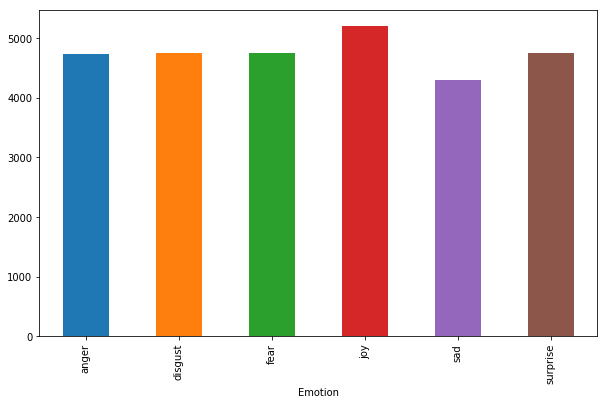

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()


In [94]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [95]:
df['Text'] = df['Text'].apply(clean_text)

In [96]:

def print_plot(index):
    example = df[df.index == index][['Text', 'Emotion']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Emotion:', example[1])

print_plot(10)

print_plot(100)

disgust turned tv new fashion police im still changes channel
Emotion: disgust
unjoy claxstone smooth blue deli
Emotion: joy


In [97]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each sentence.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


In [98]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26575 unique tokens.


In [99]:

X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(df['Emotion']).values
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (28507, 250)
Shape of label tensor: (28507, 6)


In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(25656, 250) (25656, 6)
(2851, 250) (2851, 6)


In [101]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 606       
Total params: 5,081,006
Trainable params: 5,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
epochs = 2
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 23090 samples, validate on 2566 samples
Epoch 1/2
23090/23090 [==============================] - 191s 8ms/step - loss: 1.7899 - acc: 0.1790 - val_loss: 1.7889 - val_acc: 0.1820
Epoch 2/2
23090/23090 [==============================] - 193s 8ms/step - loss: 1.7874 - acc: 0.1825 - val_loss: 1.7868 - val_acc: 0.1820


In [84]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


2851/2851 [==============================] - 5s 2ms/step
Test set
  Loss: 1.786
  Accuracy: 0.185


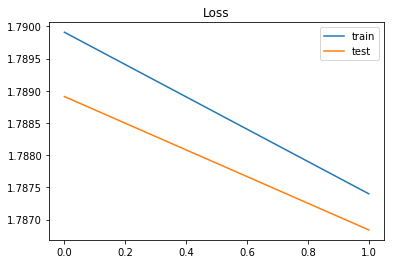

In [85]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


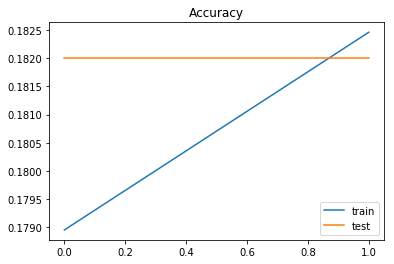

In [86]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [92]:
## Test with a new sentence.

new_sentence = ['I m so  that you agreed to go see anabelle with me tomorrow']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sad','anger','fear','surprise','disgust','joy']
print(pred, labels[np.argmax(pred)])

[[0.16490161 0.1668578  0.16588497 0.18193659 0.15399894 0.16642   ]] surprise


In [91]:
## Test with a new sentence.

new_sentence = ['Isnt it kinda  that nobody cares when you are missing anymore']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['surprise','anger','fear','sad','disgust','joy']
print(pred, labels[np.argmax(pred)])

[[0.16394418 0.1666415  0.16444023 0.1841312  0.15279277 0.16805004]] sad


In [93]:
new_sentence = ['Nah Im being dead serious my fan been acting funny lately and Im  because its right over my bed']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['surprise','anger','fear','sad','disgust','joy']
print(pred, labels[np.argmax(pred)])

[[0.16396618 0.16678932 0.16377096 0.18439578 0.15382367 0.16725409]] sad
